In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv(r"/Users/adiii/Downloads/ai_financial_market_daily_realistic_synthetic.csv")

In [4]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [5]:
#basic info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


Convert datatype of date column into datatime format


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


In [10]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [11]:
#Show company names

df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [12]:
#New column for year only

df['Year'] = df['Date'].dt.year


How much amount the companies spend on R&D ?


In [17]:
print("Company's spending for R & D in $Billion")
RD = df.groupby('Company')['R&D_Spending_USD_Mn'].sum()/100

Company's spending for R & D in $Billion


Draw a Bar Plot to show the amount spent on R&D by the companies

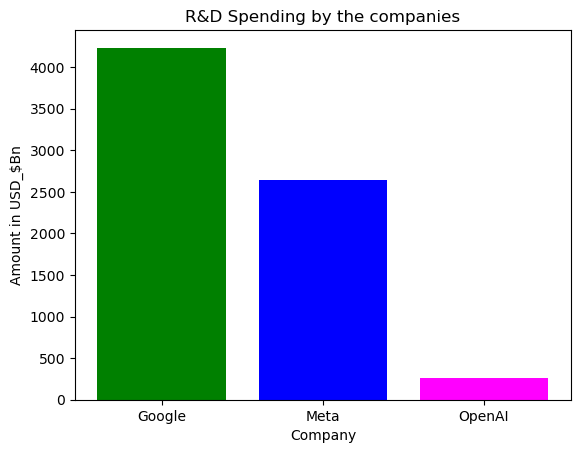

In [19]:
plt.bar(RD.index,RD.values,color=['green','blue','magenta'])

plt.title("R&D Spending by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")
plt.show()

Revenue Earned by companies


In [20]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [24]:
print("Company's AI_Revenue_USD_Bn")
rev=df.groupby('Company')['AI_Revenue_USD_Mn'].sum()/1000
rev

Company's AI_Revenue_USD_Bn


Company
Google    284.49838
Meta      189.62182
OpenAI      9.46289
Name: AI_Revenue_USD_Mn, dtype: float64

Draw a Bar Plot to show the amount of revenue Earned by companies

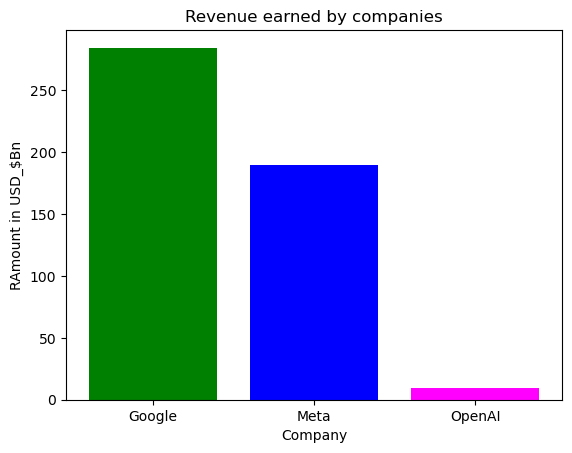

In [26]:
plt.bar(rev.index , rev.values,color=['green','blue','magenta'])
plt.title("Revenue earned by companies")
plt.xlabel("Company")
plt.ylabel("RAmount in USD_$Bn")

plt.show()

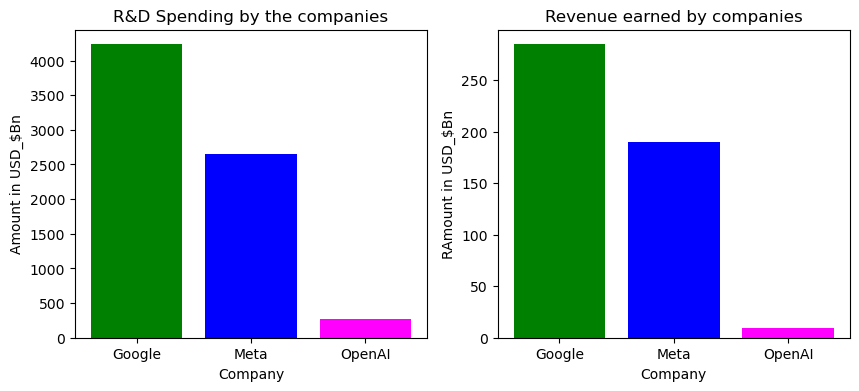

In [27]:
#Bar plot to show Expenditure and Revenue of the company

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)

plt.bar(RD.index,RD.values,color=['green','blue','magenta'])

plt.title("R&D Spending by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")

plt.subplot(1,2,2)

plt.bar(rev.index , rev.values,color=['green','blue','magenta'])
plt.title("Revenue earned by companies")
plt.xlabel("Company")
plt.ylabel("RAmount in USD_$Bn")

plt.show()

Datewise impact on the stock

In [29]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


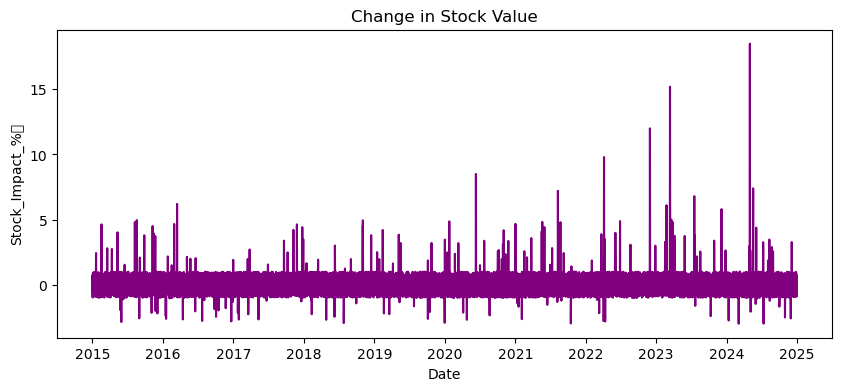

In [35]:
plt.figure(figsize = (10,4))

plt.plot(df['Date'] , df['Stock_Impact_%'],color = 'purple')
plt.title("Change in Stock Value")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%	")

plt.show()

Create 3 Seprate dataframes

In [36]:
df.head()


,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [37]:
data_openai=df[df['Company']=='OpenAI']


In [38]:
data_google=df[df['Company']=='Google']


In [39]:

data_meta=df[df['Company']=='Meta']


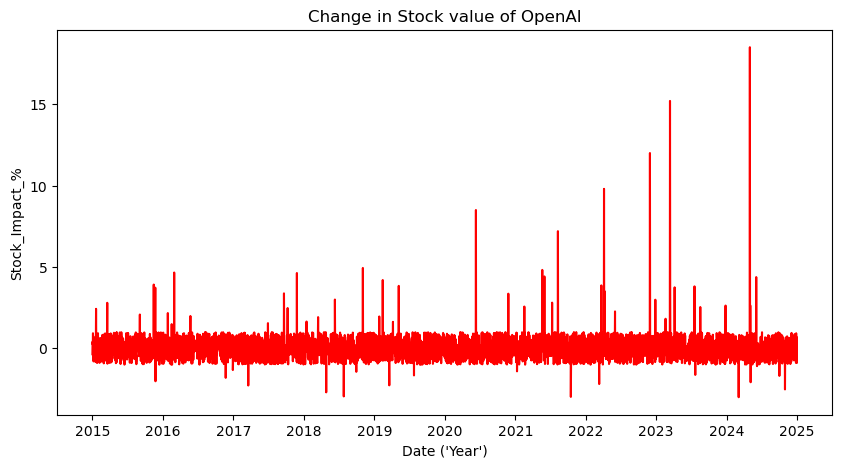

In [40]:
plt.figure(figsize=(10,5))
plt.plot(data_openai['Date'],data_openai['Stock_Impact_%'],color='r')

plt.title("Change in Stock value of OpenAI")
plt.xlabel("Date ('Year')")
plt.ylabel("Stock_Impact_%")

plt.show()


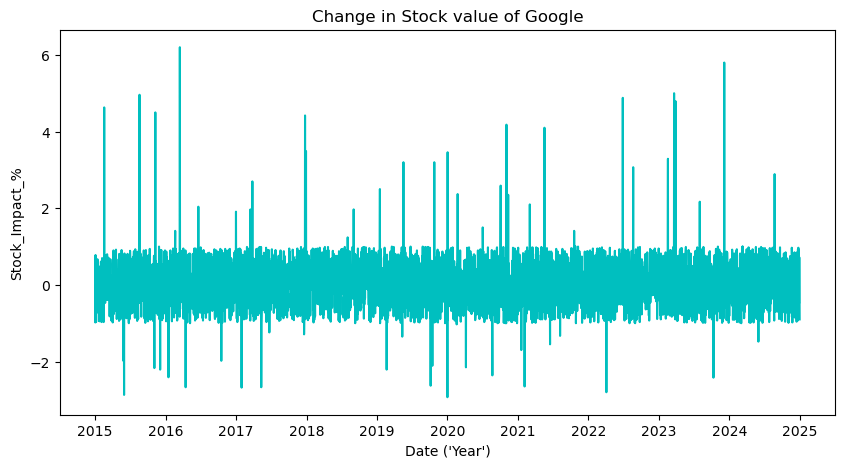

In [41]:
plt.figure(figsize=(10,5))
plt.plot(data_google['Date'],data_google['Stock_Impact_%'],color='c')

plt.title("Change in Stock value of Google")
plt.xlabel("Date ('Year')")
plt.ylabel("Stock_Impact_%")

plt.show()

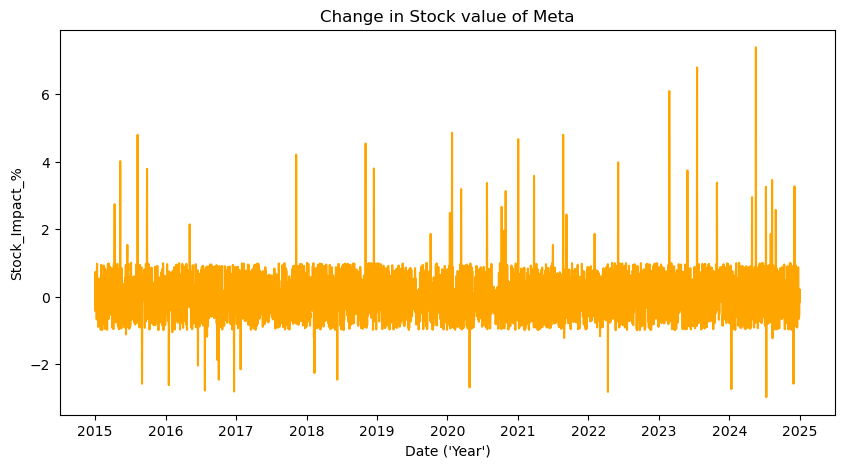

In [45]:
plt.figure(figsize=(10,5))
plt.plot(data_meta['Date'],data_meta['Stock_Impact_%'],color='orange')

plt.title("Change in Stock value of Meta")
plt.xlabel("Date ('Year')")
plt.ylabel("Stock_Impact_%")

plt.show()

Events when Maximum Stock impact was observed

In [46]:
df.head()


,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [47]:
# OpenAI's Events when Maximum Stock Impact was observed

data_openai

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,NaN,0.93,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,NaN,-0.25,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,NaN,0.47,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,NaN,0.69,2024


In [48]:
data_openai.sort_values(by='Stock_Impact_%',ascending=False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50,2024
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20,2023
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00,2022
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80,2022
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50,2020
...,...,...,...,...,...,...,...,...
3590,2024-10-30,OpenAI,11.05,5.27,427.50,AI-powered search update,-2.52,2024
1212,2018-04-27,OpenAI,5.38,1.76,76.47,AI ethics policy update,-2.70,2018
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95,2018
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98,2021


In [49]:
# Google's Events when Maximum Stock Impact was observed

data_google

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3653,2015-01-01,Google,79.89,30.19,0.64,NaN,-0.02,2015
3654,2015-01-02,Google,78.99,30.44,1.47,NaN,-0.98,2015
3655,2015-01-03,Google,79.20,30.46,1.53,NaN,0.78,2015
3656,2015-01-04,Google,79.59,30.55,1.82,NaN,-0.41,2015
3657,2015-01-05,Google,81.50,30.59,1.97,NaN,-0.78,2015
...,...,...,...,...,...,...,...,...
7301,2024-12-27,Google,162.16,155.36,417.88,NaN,-0.46,2024
7302,2024-12-28,Google,159.69,154.47,414.89,NaN,-0.48,2024
7303,2024-12-29,Google,161.69,154.59,415.31,NaN,0.72,2024
7304,2024-12-30,Google,158.48,155.05,416.84,NaN,-0.17,2024


In [50]:
data_google.sort_values(by='Stock_Impact_%',ascending=False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,2022
...,...,...,...,...,...,...,...,...
4122,2016-04-14,Google,87.19,36.08,20.28,AI partnership deal,-2.67,2016
4412,2017-01-29,Google,92.21,43.25,44.17,AI Ads Optimization upgrade,-2.68,2017
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80,2022
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87,2015


In [51]:
# Meta's Events when Maximum Stock Impact was observed

data_meta


,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


In [52]:
data_meta.sort_values(by = 'Stock_Impact_%',ascending=False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,2020
9732,2021-08-23,Meta,78.19,59.36,196.79,Cloud AI launch,4.80,2021
...,...,...,...,...,...,...,...,...
10604,2024-01-12,Meta,99.37,104.28,421.42,AI Video Recommendation upgrade,-2.75,2024
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79,2016
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82,2016
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83,2022


In [53]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


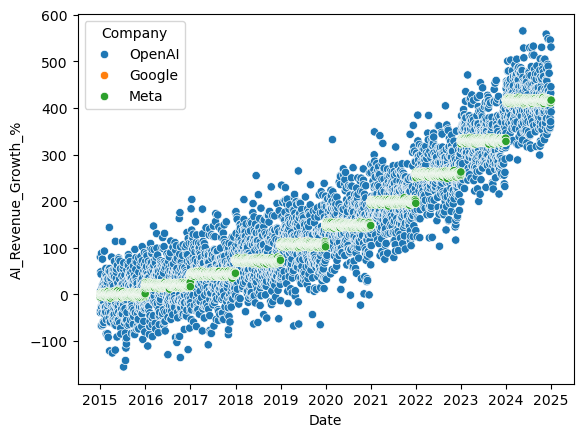

In [54]:
sns.scatterplot(x='Date',y='AI_Revenue_Growth_%',data=df,hue='Company')

plt.show()

In [55]:
df.sort_values(by = ['AI_Revenue_Growth_%'])

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
189,2015-07-09,OpenAI,5.66,-0.55,-155.43,NaN,0.70,2015
205,2015-07-25,OpenAI,5.23,-0.42,-141.61,NaN,-0.62,2015
649,2016-10-11,OpenAI,5.37,-0.35,-135.31,NaN,0.12,2016
548,2016-07-02,OpenAI,5.19,-0.29,-129.11,NaN,-0.31,2016
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,NaN,-0.56,2015
...,...,...,...,...,...,...,...,...
3508,2024-08-09,OpenAI,9.92,6.33,532.86,NaN,0.77,2024
3645,2024-12-24,OpenAI,8.79,6.46,546.07,NaN,0.45,2024
3627,2024-12-06,OpenAI,8.51,6.49,548.83,NaN,-0.15,2024
3612,2024-11-21,OpenAI,10.16,6.59,558.70,NaN,0.63,2024


OpenAI's Revenue Growth Year-by-Year

In [58]:
data_openai

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,NaN,0.93,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,NaN,-0.25,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,NaN,0.47,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,NaN,0.69,2024


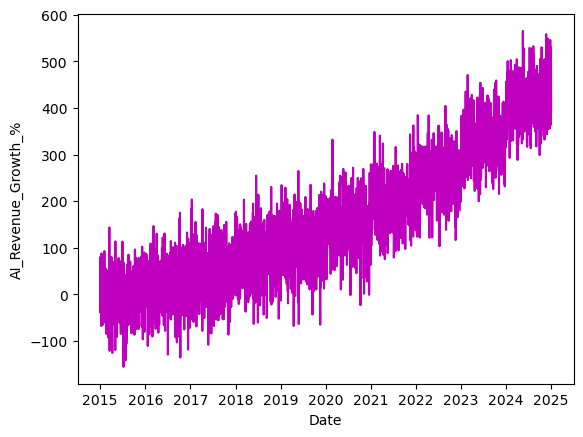

In [59]:
# Open AI Revenue Growth year by year 
plt.plot(data_openai['Date'],data_openai['AI_Revenue_Growth_%'],color='m')
plt.xlabel('Date')
plt.ylabel('AI_Revenue_Growth_%')
plt.show()

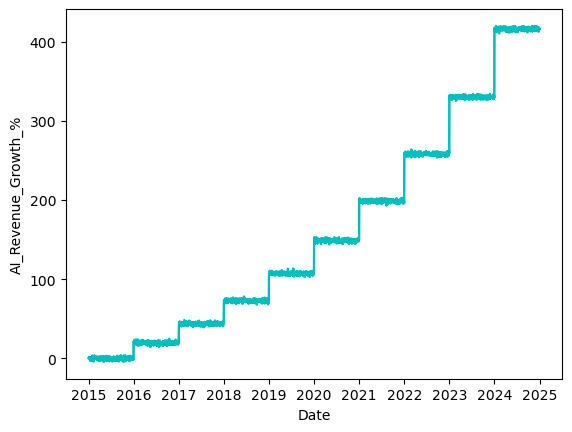

In [61]:
# Google's AI Revenue Growth year by year
plt.plot(data_google['Date'],data_google['AI_Revenue_Growth_%'],color='c')
plt.xlabel('Date')
plt.ylabel('AI_Revenue_Growth_%')
plt.show()

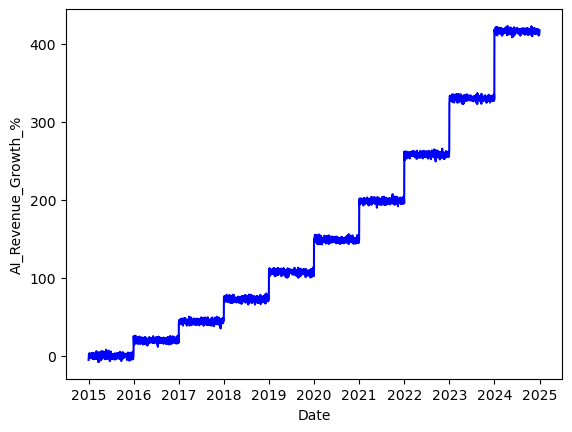

In [62]:
#Meta's AI Revenue Growth year by year

plt.plot(data_meta['Date'],data_meta['AI_Revenue_Growth_%'],color='b')
plt.xlabel('Date')
plt.ylabel('AI_Revenue_Growth_%')
plt.show()

Correlation between the columns

In [67]:
df.corr(numeric_only=True)

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year
R&D_Spending_USD_Mn,1.000000,0.935030,0.291245,-0.004628,0.297701
AI_Revenue_USD_Mn,0.935030,1.000000,0.530128,-0.000017,0.526478
AI_Revenue_Growth_%,0.291245,0.530128,1.000000,0.020937,0.952199
Stock_Impact_%,-0.004628,-0.000017,0.020937,1.000000,0.016525
Year,0.297701,0.526478,0.952199,0.016525,1.000000


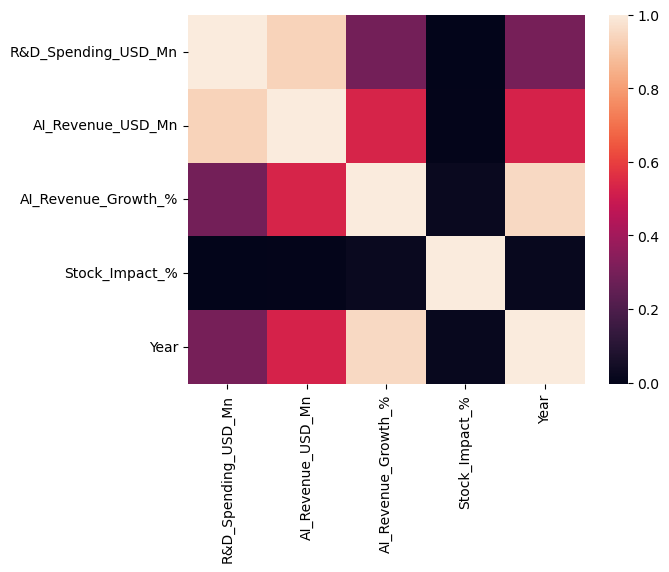

In [70]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

Expenditure VS Revenue year-by-year

In [71]:
df.head

<bound method NDFrame.head of             Date Company  R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
0     2015-01-01  OpenAI                 5.92               0.63   
1     2015-01-02  OpenAI                 5.41               1.81   
2     2015-01-03  OpenAI                 4.50               0.61   
3     2015-01-04  OpenAI                 5.45               0.95   
4     2015-01-05  OpenAI                 3.40               1.48   
...          ...     ...                  ...                ...   
10954 2024-12-27    Meta               100.19             103.54   
10955 2024-12-28    Meta                99.12             102.37   
10956 2024-12-29    Meta                98.95             103.11   
10957 2024-12-30    Meta               100.74             103.21   
10958 2024-12-31    Meta               100.08             103.41   

       AI_Revenue_Growth_% Event  Stock_Impact_%  Year  
0                   -36.82   NaN           -0.36  2015  
1                    80.59   NaN       

In [72]:
spend=df.groupby('Year')['R&D_Spending_USD_Mn'].sum()
spend

Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

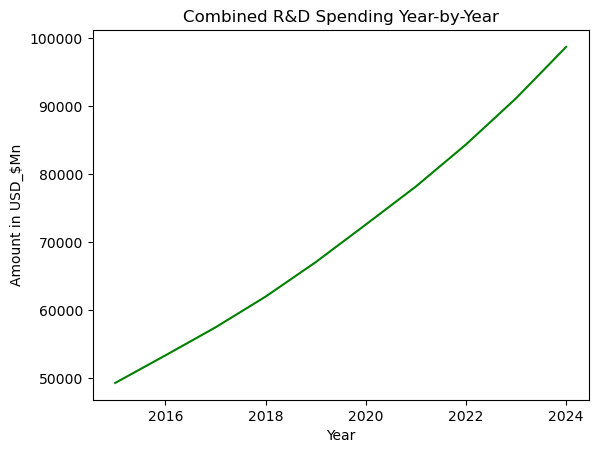

In [74]:
# Showing the Amount spent on R&D

plt.plot(spend.index,spend.values,color='g')
plt.title("Combined R&D Spending Year-by-Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.show()

In [75]:
revenue=df.groupby('Year')['AI_Revenue_USD_Mn'].sum()
revenue

Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64

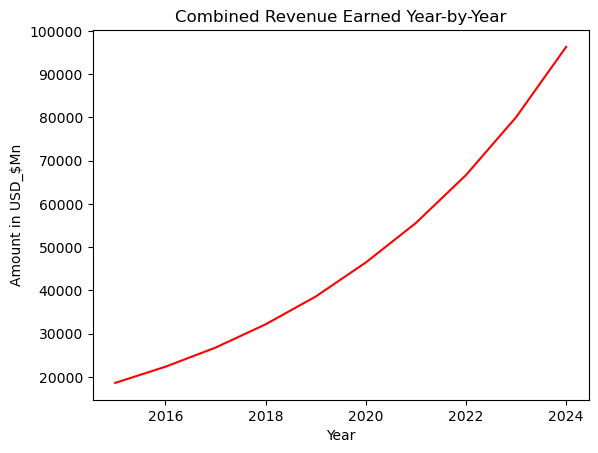

In [78]:
# SHowing the Revenue earned
plt.plot(revenue.index,revenue.values,color='red')
plt.title("Combined Revenue Earned Year-by-Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.show()

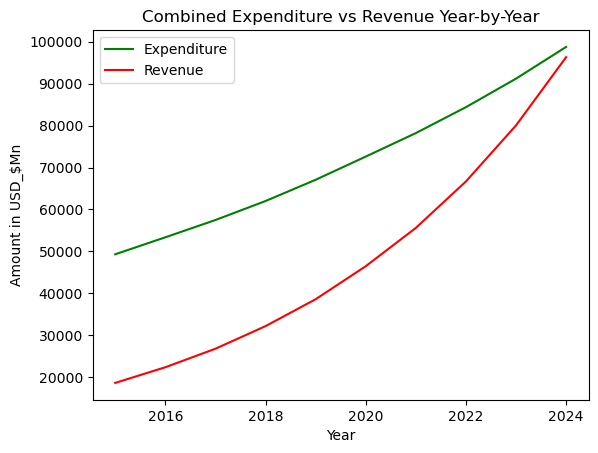

In [81]:
plt.plot(spend.index,spend.values,color='g')
plt.plot(revenue.index,revenue.values,color='r')
plt.title("Combined Expenditure vs Revenue Year-by-Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.legend(['Expenditure','Revenue'])
plt.show()

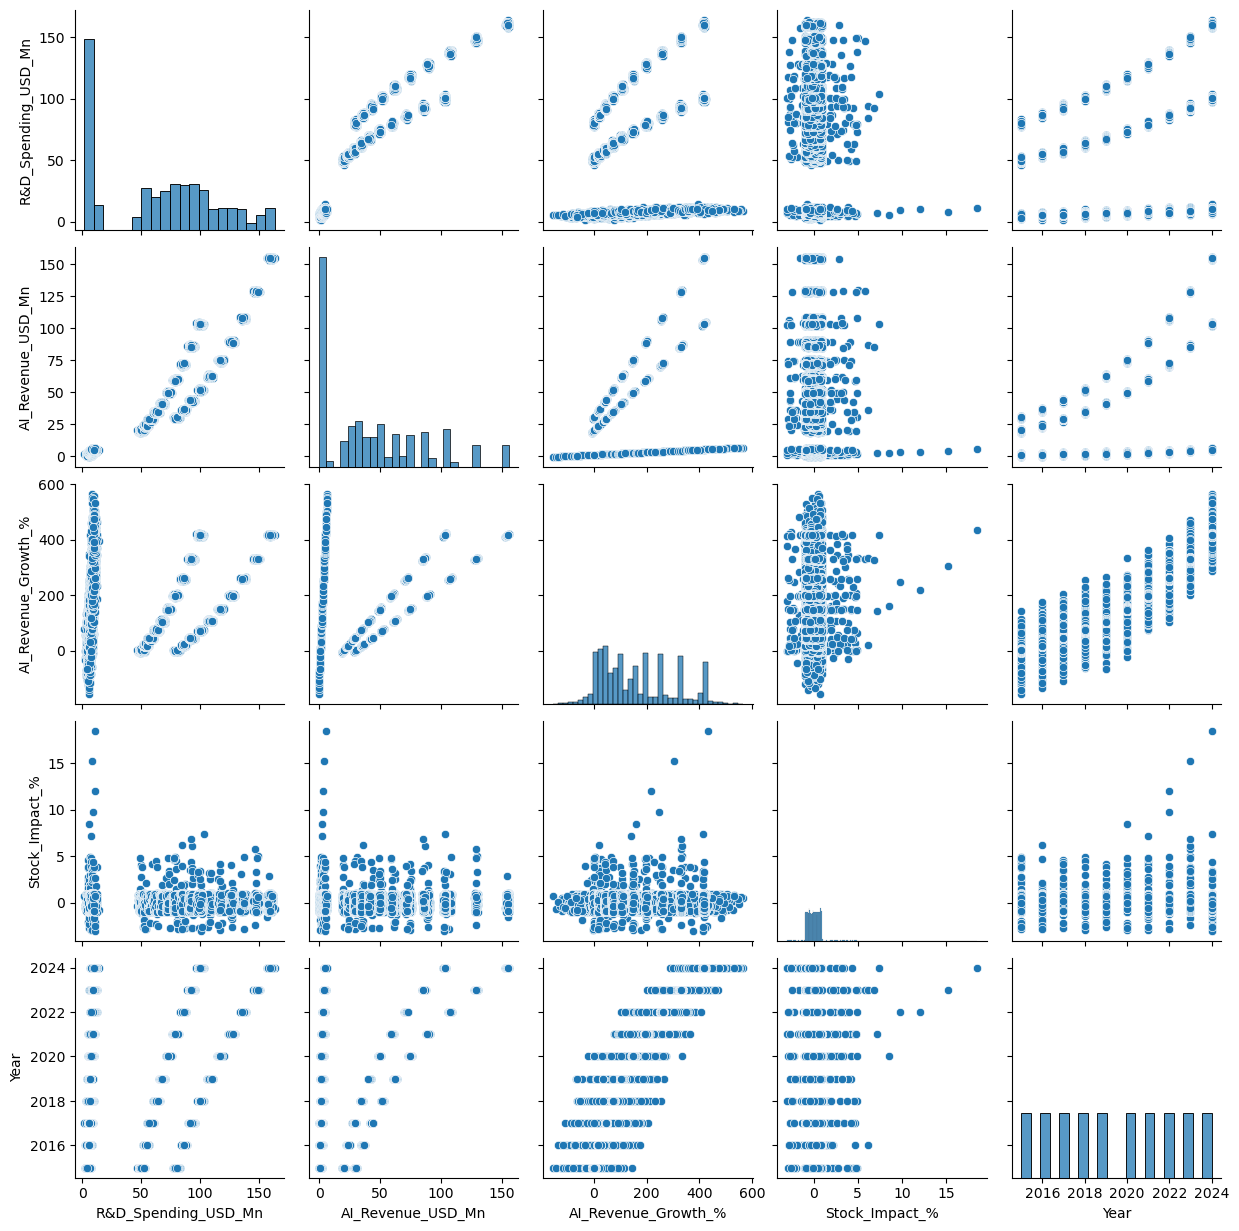

In [85]:
sns.pairplot(df)
plt.show()

In [86]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [87]:
df.Event.value_counts()


Event
AI speech recognition release      37
AI-powered search update           32
AI Ads Optimization upgrade        32
AI partnership deal                32
AI Video Recommendation upgrade    29
Cloud AI launch                    27
AI ethics policy update            27
TensorFlow open-source release      1
LLaMA 2 release                     1
LLaMA 1 release                     1
Gemini AI release                   1
Bard chatbot launch                 1
MUM Search Model launch             1
BERT for Search launch              1
AlphaGo beats Lee Sedol             1
ChatGPT (GPT-3.5) launch            1
GPT-5 release (predicted)           1
GPT-4 release                       1
DALL·E 2 release                    1
Codex release                       1
GPT-3 release                       1
GPT-2 release                       1
GPT-1 release                       1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

In [88]:
# Checking for a particular event
df[df.Event=='TensorFlow open-source release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3965,2015-11-09,Google,79.62,29.84,-0.53,TensorFlow open-source release,4.5,2015


In [89]:
tf=df.loc[3955:3975]
tf

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3955,2015-10-30,Google,80.33,29.87,-0.43,NaN,0.43,2015
3956,2015-10-31,Google,79.53,30.30,0.99,NaN,-0.84,2015
3957,2015-11-01,Google,80.37,29.86,-0.48,NaN,0.57,2015
3958,2015-11-02,Google,77.89,29.97,-0.10,NaN,0.76,2015
3959,2015-11-03,Google,81.00,29.43,-1.89,NaN,-0.45,2015
3960,2015-11-04,Google,80.70,29.71,-0.96,AI speech recognition release,-2.17,2015
3961,2015-11-05,Google,78.31,30.25,0.85,NaN,0.31,2015
3962,2015-11-06,Google,79.08,29.84,-0.54,NaN,-0.72,2015
3963,2015-11-07,Google,79.65,30.34,1.14,NaN,0.58,2015
3964,2015-11-08,Google,79.63,29.74,-0.86,NaN,-0.61,2015


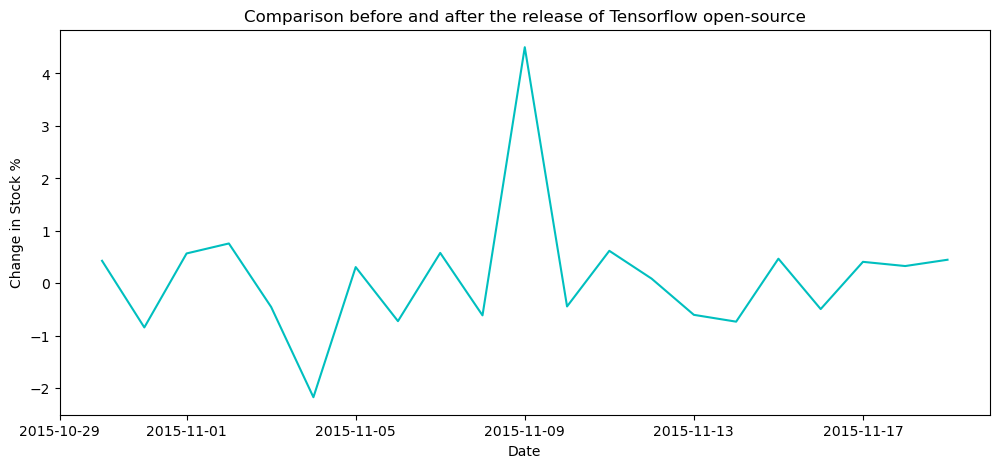

In [92]:
# showing the Impact with a line chart

plt.figure(figsize=(12,5))
plt.plot(tf['Date'],tf['Stock_Impact_%'],color='c')
plt.title("Comparison before and after the release of Tensorflow open-source")
plt.xlabel("Date")
plt.ylabel("Change in Stock %")
plt.show()

In [93]:
# Daily Average impact on the Stocks of the companies

df.groupby('Company')['Stock_Impact_%'].mean()*100

Company
Google    2.620860
Meta      0.976184
OpenAI    4.070901
Name: Stock_Impact_%, dtype: float64

In [94]:
# Daily Average Expenditure on R&D by the companies

df.groupby('Company')['R&D_Spending_USD_Mn'].mean()

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

In [95]:
# Maximum impact % on a company's stock

df.groupby('Company')['Stock_Impact_%'].max()

Company
Google     6.2
Meta       7.4
OpenAI    18.5
Name: Stock_Impact_%, dtype: float64

In [96]:
# Highest change in the index

stocks=df.groupby(['Year','Company'])['Stock_Impact_%'].max()
stocks

Year  Company
2015  Google      4.96
      Meta        4.80
      OpenAI      3.92
2016  Google      6.20
      Meta        2.14
      OpenAI      4.66
2017  Google      4.42
      Meta        4.21
      OpenAI      4.63
2018  Google      1.97
      Meta        4.54
      OpenAI      4.94
2019  Google      3.20
      Meta        1.86
      OpenAI      4.20
2020  Google      4.18
      Meta        4.86
      OpenAI      8.50
2021  Google      4.10
      Meta        4.80
      OpenAI      7.20
2022  Google      4.88
      Meta        3.98
      OpenAI     12.00
2023  Google      5.80
      Meta        6.80
      OpenAI     15.20
2024  Google      2.89
      Meta        7.40
      OpenAI     18.50
Name: Stock_Impact_%, dtype: float64

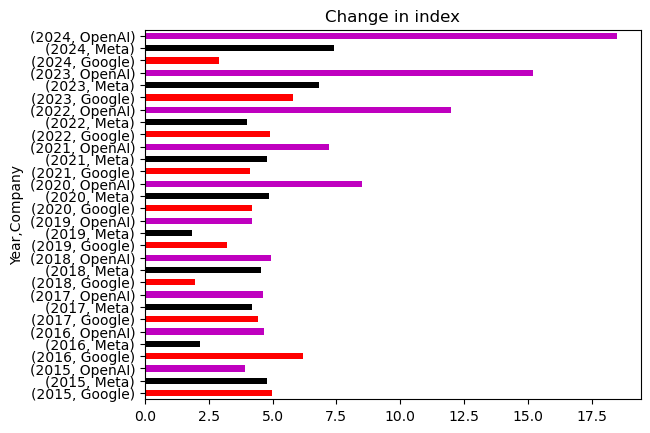

In [100]:
stocks.plot(kind='barh',color=['r','black','m'])
plt.title('Change in index')
plt.show()